In [1]:
#First import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Now we need to read in the data
df = pd.read_csv(r'E:\DataAnalysis\Portfolio Projects\Project4-CorrelationInPython\movies.csv')

In [2]:
#Look at the data 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Looking for missing data with the help of mean in Numpy and data frame of pandas

for col in df. columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [4]:
# dropping the null values from the data set

df = df.dropna()

In [5]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} : {}'.format(col, percent_missing))

name : 0.0
rating : 0.0
genre : 0.0
year : 0.0
released : 0.0
score : 0.0
votes : 0.0
director : 0.0
writer : 0.0
star : 0.0
country : 0.0
budget : 0.0
gross : 0.0
company : 0.0
runtime : 0.0


In [6]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
#Chaning the data types

df['budget'] = df['budget'].astype('int64') 

df['gross'] = df['gross'].astype('int64') 


In [9]:
# Creating new column from others with the help of extract function in pandas library
# [0-9] matches any digit between 0 and 9. and {4} specifies that the preceding character or group should be matched exactly 4 times.
df['yearcorrect'] = df['released'].str.extract(pat= '([0-9]{4})').astype(int)

In [10]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [11]:
#Month of Release
df ['monthrelease'] = df['released'].astype(str).str[:4]

In [12]:
#Sorting values according to gross
df_sorted = df.sort_values(by=['gross'] ,inplace= False, ascending=False)
df_sorted.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthrelease
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018,Apri


In [13]:
#Having the results with more rows for so on

#pd.set_option('display.max_rows',None)

In [14]:
df.sort_values(by=['yearcorrect','gross'], inplace= False, ascending= True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthrelease
80,Phobia,R,Drama,1980,"September 9, 1980 (United States)",4.0,546.0,John Huston,Gary Sherman,Paul Michael Glaser,Canada,5100000,59167,Borough Park Productions,94.0,1980,Sept
56,When Time Ran Out...,PG,Action,1980,"March 28, 1980 (United States)",4.6,2600.0,James Goldstone,Gordon Thomas,Paul Newman,United States,20000000,3763988,International Cinema,121.0,1980,Marc
51,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.8,4500.0,Jonathan Demme,Bo Goldman,Paul Le Mat,United States,7000000,4309490,Universal Pictures,95.0,1980,Sept
77,Willie & Phil,R,Comedy,1980,"August 15, 1980 (United States)",5.9,415.0,Paul Mazursky,Jean Gruault,Michael Ontkean,United States,5500000,4400000,Twentieth Century Fox,115.0,1980,Augu
57,Oh Heavenly Dog,PG,Comedy,1980,"July 11, 1980 (United States)",5.4,2400.0,Joe Camp,Rod Browning,Chevy Chase,United States,6000000,6216067,Mulberry Square Productions,103.0,1980,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,Febr
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150.0,2020,Sept
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119.0,2020,Janu
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,Janu


In [15]:
#Reseting the set option into the default values
pd.reset_option('display.max_rows')


In [16]:
df.sort_values(by=['yearcorrect','gross'], inplace= False, ascending= True)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthrelease
80,Phobia,R,Drama,1980,"September 9, 1980 (United States)",4.0,546.0,John Huston,Gary Sherman,Paul Michael Glaser,Canada,5100000,59167,Borough Park Productions,94.0,1980,Sept
56,When Time Ran Out...,PG,Action,1980,"March 28, 1980 (United States)",4.6,2600.0,James Goldstone,Gordon Thomas,Paul Newman,United States,20000000,3763988,International Cinema,121.0,1980,Marc
51,Melvin and Howard,R,Comedy,1980,"September 19, 1980 (United States)",6.8,4500.0,Jonathan Demme,Bo Goldman,Paul Le Mat,United States,7000000,4309490,Universal Pictures,95.0,1980,Sept
77,Willie & Phil,R,Comedy,1980,"August 15, 1980 (United States)",5.9,415.0,Paul Mazursky,Jean Gruault,Michael Ontkean,United States,5500000,4400000,Twentieth Century Fox,115.0,1980,Augu
57,Oh Heavenly Dog,PG,Comedy,1980,"July 11, 1980 (United States)",5.4,2400.0,Joe Camp,Rod Browning,Chevy Chase,United States,6000000,6216067,Mulberry Square Productions,103.0,1980,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020,Febr
7643,Tenet,PG-13,Action,2020,"September 3, 2020 (United States)",7.4,387000.0,Christopher Nolan,Christopher Nolan,John David Washington,United States,205000000,363656624,Warner Bros.,150.0,2020,Sept
7462,1917,R,Drama,2019,"January 10, 2020 (United States)",8.3,473000.0,Sam Mendes,Sam Mendes,Dean-Charles Chapman,United States,95000000,384623579,Dreamworks Pictures,119.0,2020,Janu
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020,Janu


In [17]:
# Sort Values

df['rating'].sort_values(ascending= False)

1065           X
2904     Unrated
2816     Unrated
4793     Unrated
3293     Unrated
          ...   
7488           G
3262           G
5339           G
3077           G
120     Approved
Name: rating, Length: 5421, dtype: object

In [18]:
# Sort column with the distinct values

df['rating'].drop_duplicates().sort_values(ascending= False)

1065            X
691       Unrated
6755        TV-MA
0               R
476         PG-13
2              PG
237     Not Rated
96          NC-17
75              G
120      Approved
Name: rating, dtype: object

In [19]:
#Drop duplicate rows
df = df.drop_duplicates()
print(df)

                                                name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes

Text(0, 0.5, 'Gross')

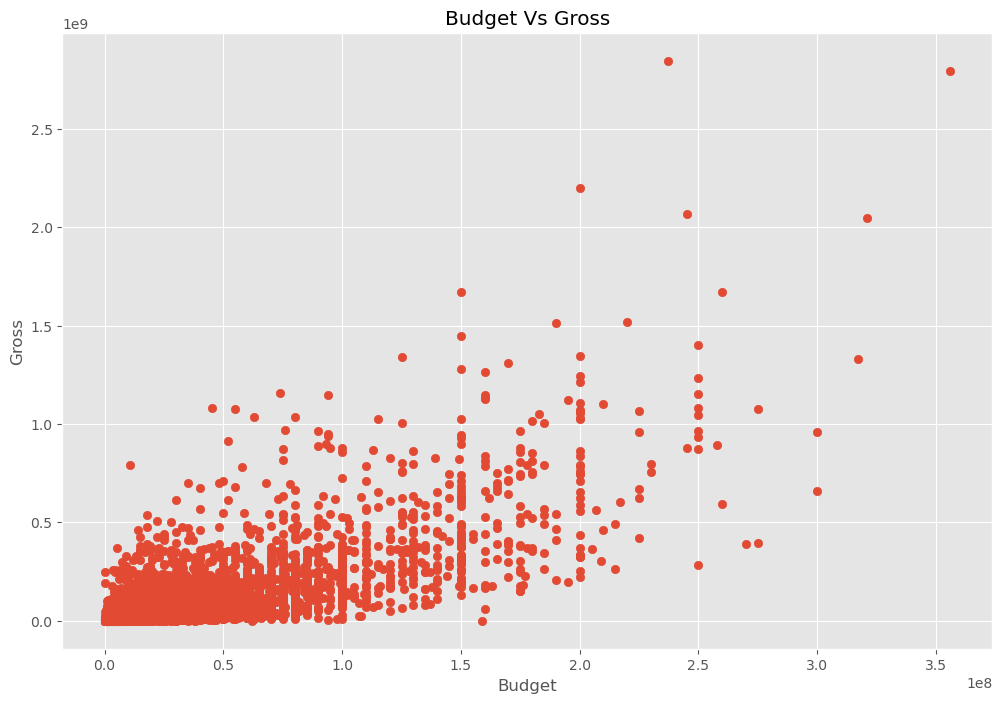

In [20]:
#Finding correlation between fields
#with use of Scatter function in matplotlib.pyplot as plt

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget Vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')


<Axes: xlabel='budget', ylabel='gross'>

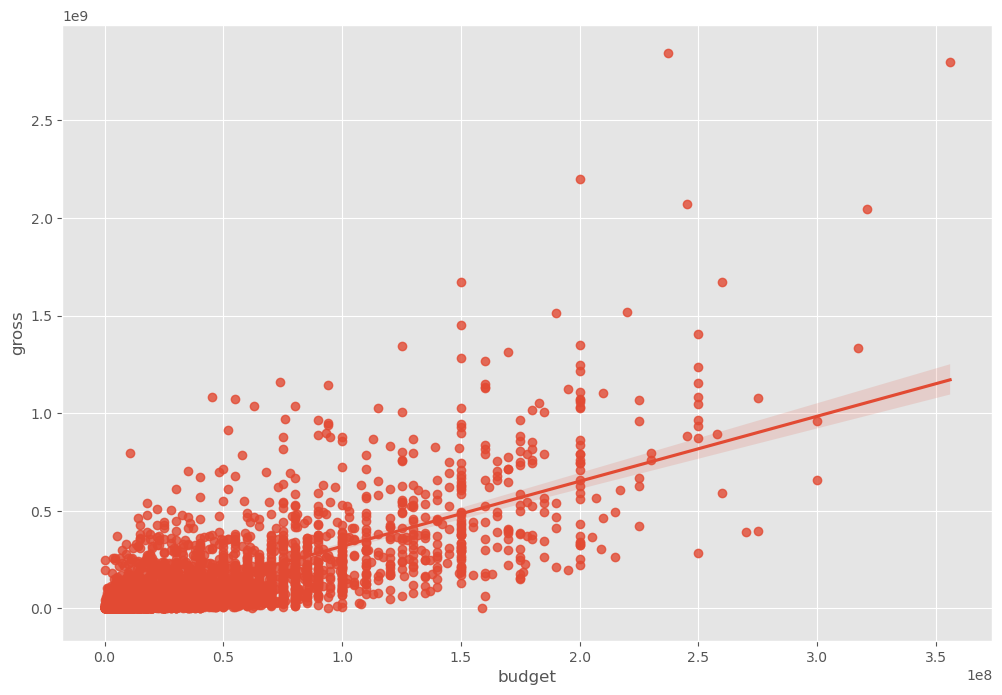

In [21]:
#Make prediction and assess it with regression plot
# predict high correlation between budget and gross
#Plot budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=df)
            

<Axes: xlabel='budget', ylabel='gross'>

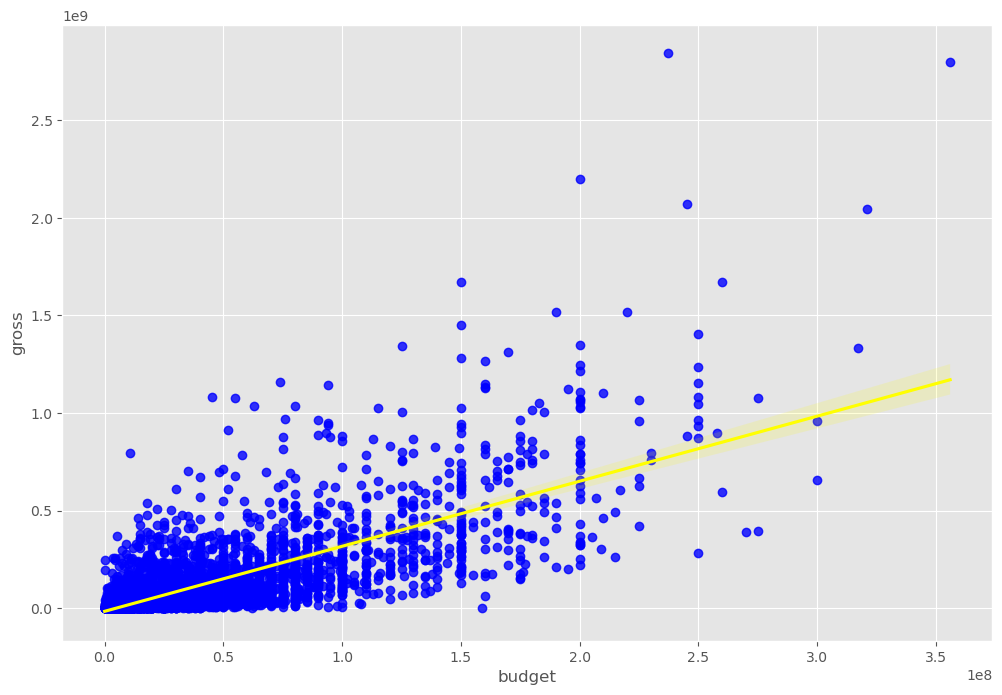

In [22]:
# distigush scatter and line of previous one

sns.regplot(x='budget',y='gross', data= df, scatter_kws= {'color': 'blue'}, line_kws= {'color':'yellow'})

In [23]:
#df.corr()
selected_columns= df[['year','score','votes','budget','gross','runtime']]
selected_columns.corr()


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [24]:
# for corr() there is 3 methods and results are a bit different
#pearson
selected_columns= df[['year','score','votes','budget','gross','runtime']]
selected_columns.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [25]:
#Kendall

selected_columns= df[['year','score','votes','budget','gross','runtime']]
selected_columns.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [26]:
#spearman

selected_columns= df[['year','score','votes','budget','gross','runtime']]
selected_columns.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [27]:
#I was right, we can see the high correlation between budget and gross

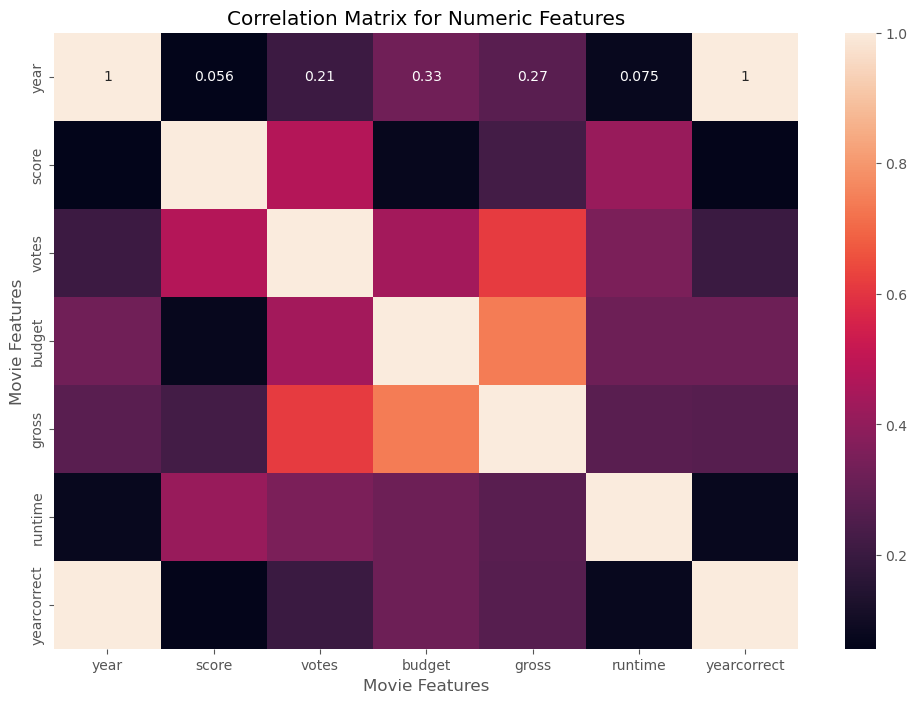

In [28]:
#correlation_matrix = df[['year','score','votes','budget','gross','runtime']]
#correlation_matrix.corr(method= 'pearson')

correlation_matrix = df.corr(numeric_only=True, method= 'pearson')
sns.heatmap(correlation_matrix,annot= True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [29]:
#Make objects or strings to numeric values,so we could use in correlation matrix

df_numrized = df
for col_name in df_numrized.columns:
    if (df_numrized[col_name].dtype == 'object'):
        df_numrized[col_name] = df_numrized[col_name].astype('category')
        # give the random numuraziation
        df_numrized[col_name] = df_numrized[col_name].cat.codes

df_numrized

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthrelease
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980,11
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980,10
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980,11
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980,10
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020,9
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020,8
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020,9
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020,8


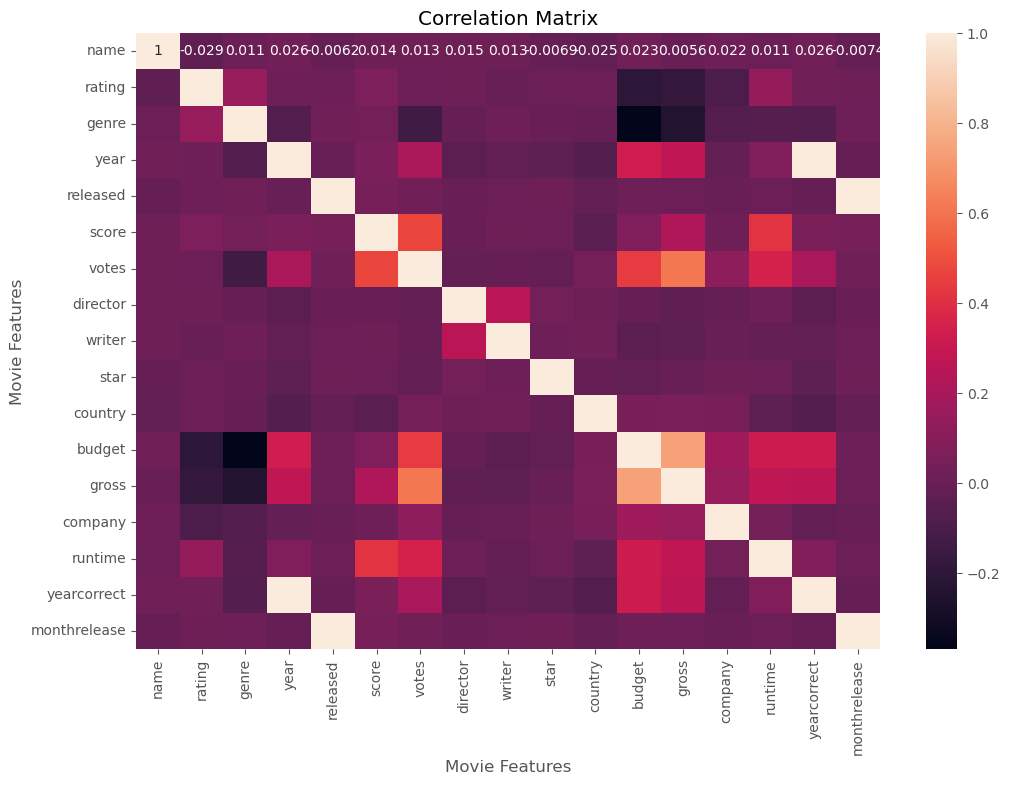

In [30]:
# Correlation of all fields
correlation_matrix = df_numrized.corr(method= 'pearson')
sns.heatmap(correlation_matrix,annot= True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [31]:
df_numrized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect,monthrelease
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542,-0.007371
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021,0.015532
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147,0.021306
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726,-0.005073
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989,0.996181
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923,0.045136
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098,0.027535
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371,0.003497
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495,0.007594
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687,0.014919


In [32]:
#ordering the correlation by unstaking
correlation_mat = df_numrized.corr()
cor_pairs = correlation_mat.unstack()
cor_pairs

name          name            1.000000
              rating         -0.029234
              genre           0.010996
              year            0.025542
              released       -0.006152
                                ...   
monthrelease  gross           0.006873
              company        -0.002361
              runtime         0.007167
              yearcorrect    -0.009223
              monthrelease    1.000000
Length: 289, dtype: float64

In [33]:
# sorting values
sorted_cor = cor_pairs.sort_values()
sorted_cor[(sorted_cor>0.5)]

gross         votes           0.614751
votes         gross           0.614751
gross         budget          0.740247
budget        gross           0.740247
monthrelease  released        0.996181
released      monthrelease    0.996181
year          yearcorrect     0.998726
yearcorrect   year            0.998726
name          name            1.000000
writer        writer          1.000000
runtime       runtime         1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
yearcorrect   yearcorrect     1.000000
monthrelease  monthrelease    1.000000
dtype: float64

In [34]:
####   votes and budget have the highest correlation to gross earnings